## Assignment 4 : Beat the Bot

### Abstract 

This project aims to use H20 automl to generate models for this dataset. Keeping 1000 seconds as runtime, generate the leaderboard and attempt to improve the metrics from the ones generated on leaderboard. That's why this assignment is called as Beat the Bot. 


### Aim/Purpose of research

Project aims to beat the score of the metrics generated by H20 Automl leaderboard using different techniques. 

### About the dataset 

This dataset is about travel insurance dataset where we are trying to predict whether user will claim the travel insurance or not. This dataset has been taken from Kaggle website. 

This dataset has approximately 63,327 records and has 11 attributes. It consists of numeric , categorical and binary categorical variables. 

Target attribute : Claim 

### Exploring the dataset 

In [1]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,39 mins 37 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.1
H2O cluster version age:,18 days
H2O cluster name:,H2O_from_python_Ashmita_l1lkog
H2O cluster total nodes:,1
H2O cluster free memory:,3.522 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [2]:
# importing libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from pylab import rcParams
from scipy.stats import spearmanr
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, make_scorer

In [3]:
# importing the dataset
df=pd.read_csv("travel insurance.csv", decimal = ',')

In [4]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.7,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [5]:
df.info
df.shape

(63326, 11)

In [6]:
df.dtypes

Agency                  object
Agency Type             object
Distribution Channel    object
Product Name            object
Claim                   object
Duration                 int64
Destination             object
Net Sales               object
Commision (in value)    object
Gender                  object
Age                      int64
dtype: object

In [7]:
df.describe()

,Duration,Age
count,63326.000000,63326.000000
mean,49.317074,39.969981
std,101.791566,14.017010
min,-2.000000,0.000000
25%,9.000000,35.000000
50%,22.000000,36.000000
75%,53.000000,43.000000
max,4881.000000,118.000000


In [8]:
df.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age'],
      dtype='object')

### Data Cleaning 

We need to clean the data and transform the data so that it can be used for furthur analysis and fit into different models. We will be checking for null values, treating null values, outliers data, skewness and encoding categorical variables.

### Checking null values 

We will check for null values and in case if there are any null values then either treat them with default or other good values or drop columns having excessive null values from the dataframe so that accurate results can be predicted.

In [9]:
# Checking for null values
df.isnull().values.any()

True

In [10]:
df.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

In [11]:
df = df.drop(['Gender'], axis=1)

As Gender contains lot of missing values, we are dropping Gender column so that we can get better data. 

In [12]:
#renaming columns such as Net Sales and Commision(in value) for better clarity.
df.rename(columns={'Net Sales':'Net_Sales',
                          'Commision (in value)':'commision_invalue'}, 
                 inplace=True)

In [13]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net_Sales,commision_invalue,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29,9.57,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29,9.57,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.7,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,41


In [14]:
from sklearn import preprocessing
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

In [15]:
print(df.Net_Sales.max(), df.Net_Sales.min())
print(df.commision_invalue.max(),df.commision_invalue.min())

99.45 -0.07
99.9 0


In [16]:
# Create x, where x the 'Net Sales' column's values as floats
x = df[['Net_Sales']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)

In [17]:
df_normalized


,0
0,0.300250
1,0.300250
2,0.283153
3,0.291410
4,0.307923
5,0.223520
6,0.291410
7,0.233611
8,0.307923
9,0.241868


In [18]:
# Plot the dataframe
#df_normalized.plot(kind='bar')

In [19]:
#normally_distributed = np.random.normal(size=10000)  # Generate normal data*

#normally_distributed = pd.DataFrame(normally_distributed) # Convert to DF

#normally_distributed.hist(figsize=(8,8),                  # Plot histogram
                          #bins=30)       

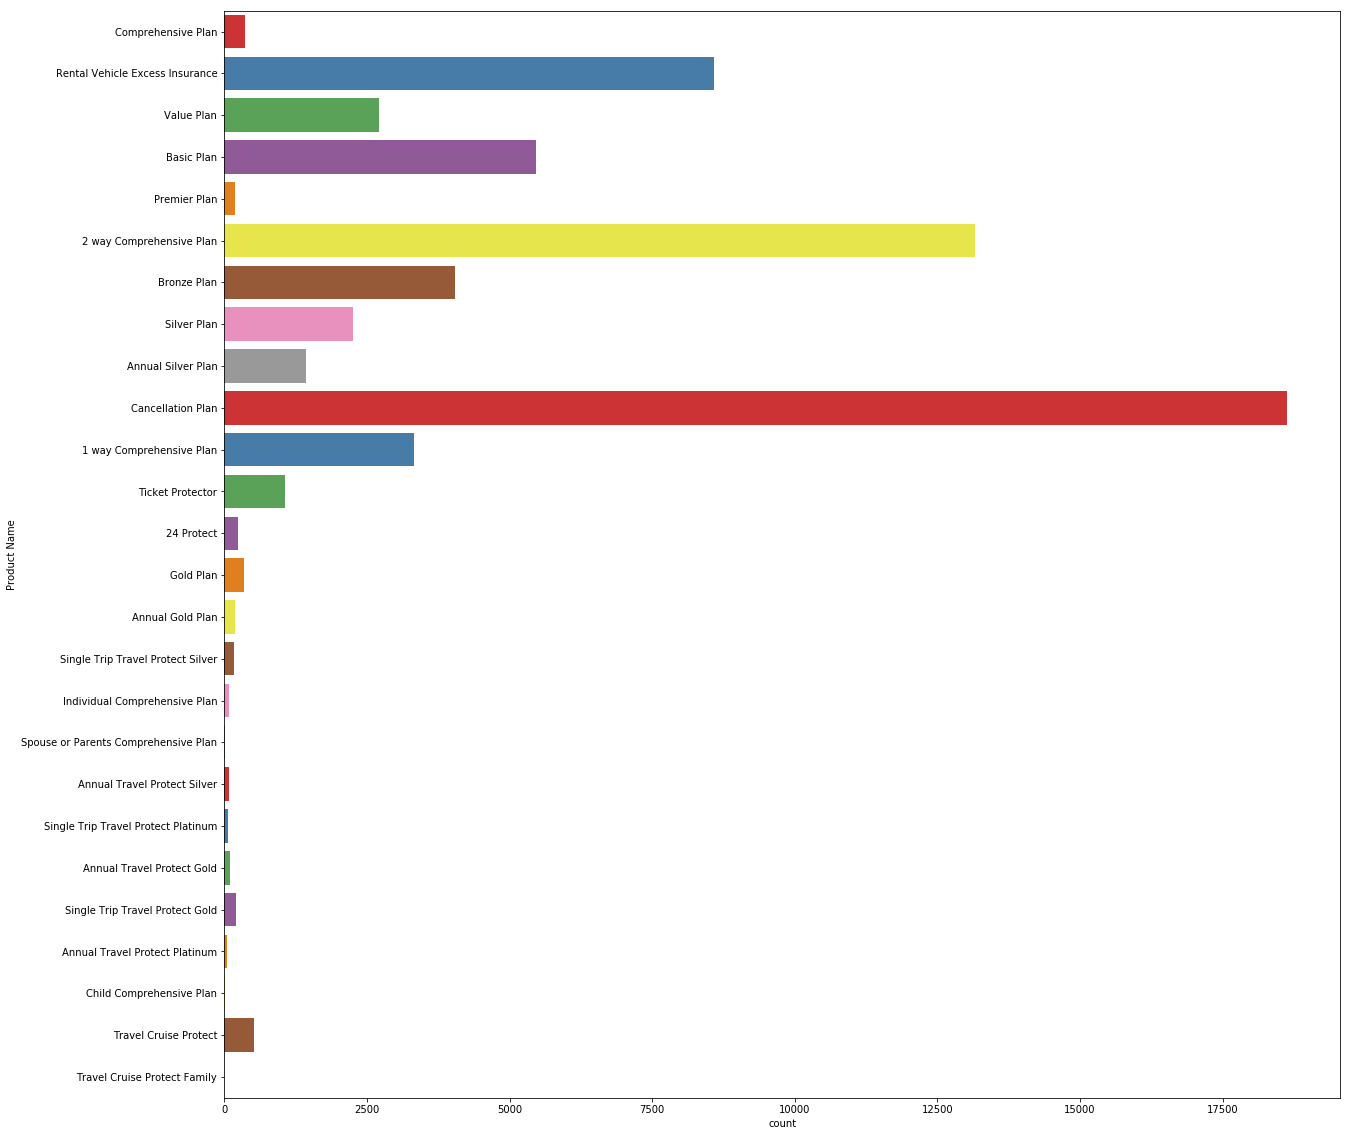

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
sns.countplot(y="Product Name", data=df, palette="Set1",);

### Categorical Encoding

We need to use categorical encoding so that categorical data has good values which could be useful for furthur data analysis. One Hot encoding technique is used for encoding the categorical columns.

In [21]:
#one hot encode
agency={"Agency Type":{"Travel Agency":1,"Airlines":2}}
df.replace(agency, inplace=True)
df.head(10)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net_Sales,commision_invalue,Age
0,CBH,1,Offline,Comprehensive Plan,No,186,MALAYSIA,-29,9.57,81
1,CBH,1,Offline,Comprehensive Plan,No,186,MALAYSIA,-29,9.57,71
2,CWT,1,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.7,32
3,CWT,1,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,32
4,CWT,1,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,41
5,JZI,2,Online,Value Plan,No,66,UNITED STATES,-121,42.35,44
6,CWT,1,Online,Rental Vehicle Excess Insurance,No,47,UNITED STATES,-39.6,23.76,32
7,CWT,1,Online,Rental Vehicle Excess Insurance,No,63,AUSTRALIA,-108.9,65.34,29
8,CWT,1,Online,Rental Vehicle Excess Insurance,No,57,THAILAND,-19.8,11.88,44
9,CWT,1,Online,Rental Vehicle Excess Insurance,No,186,AUSTRALIA,-99,59.4,37


In [22]:
#one hot encode
distribution_channel={"Distribution Channel":{"Offline":1,"Online":2}}
df.replace(distribution_channel, inplace=True)
df.head(10)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net_Sales,commision_invalue,Age
0,CBH,1,1,Comprehensive Plan,No,186,MALAYSIA,-29,9.57,81
1,CBH,1,1,Comprehensive Plan,No,186,MALAYSIA,-29,9.57,71
2,CWT,1,2,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.7,32
3,CWT,1,2,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,32
4,CWT,1,2,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,41
5,JZI,2,2,Value Plan,No,66,UNITED STATES,-121,42.35,44
6,CWT,1,2,Rental Vehicle Excess Insurance,No,47,UNITED STATES,-39.6,23.76,32
7,CWT,1,2,Rental Vehicle Excess Insurance,No,63,AUSTRALIA,-108.9,65.34,29
8,CWT,1,2,Rental Vehicle Excess Insurance,No,57,THAILAND,-19.8,11.88,44
9,CWT,1,2,Rental Vehicle Excess Insurance,No,186,AUSTRALIA,-99,59.4,37


In [23]:
#one hot encode
gender={"Gender ":{"F":1,"M":2, np.nan:3}}
df.replace(gender, inplace=True)
df.head(10)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net_Sales,commision_invalue,Age
0,CBH,1,1,Comprehensive Plan,No,186,MALAYSIA,-29,9.57,81
1,CBH,1,1,Comprehensive Plan,No,186,MALAYSIA,-29,9.57,71
2,CWT,1,2,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.7,32
3,CWT,1,2,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,32
4,CWT,1,2,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,41
5,JZI,2,2,Value Plan,No,66,UNITED STATES,-121,42.35,44
6,CWT,1,2,Rental Vehicle Excess Insurance,No,47,UNITED STATES,-39.6,23.76,32
7,CWT,1,2,Rental Vehicle Excess Insurance,No,63,AUSTRALIA,-108.9,65.34,29
8,CWT,1,2,Rental Vehicle Excess Insurance,No,57,THAILAND,-19.8,11.88,44
9,CWT,1,2,Rental Vehicle Excess Insurance,No,186,AUSTRALIA,-99,59.4,37


In [24]:
df['Agency'] = pd.DataFrame(df['Agency'])
df['Agency']=df['Agency'].astype("category").cat.codes
df['Agency'].head(10)

0    3
1    3
2    6
3    6
4    6
5    9
6    6
7    6
8    6
9    6
Name: Agency, dtype: int8

In [25]:
df['Product Name'] = pd.DataFrame(df['Product Name'])
df['Product Name']=df['Product Name'].astype("category").cat.codes
df['Product Name'].head(10)

0    12
1    12
2    16
3    16
4    16
5    25
6    16
7    16
8    16
9    16
Name: Product Name, dtype: int8

In [26]:
df['Destination'] = pd.DataFrame(df['Destination'])
df['Destination']=df['Destination'].astype("category").cat.codes
df['Destination'].head(10)

0     79
1     79
2      4
3      4
4     61
5    140
6    140
7      4
8    129
9      4
Name: Destination, dtype: int16

In [27]:
#one hot encode
claim_status= {"Claim":{"No":0, "Yes":1}}
df.replace(claim_status,inplace=True)
df.head(10)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net_Sales,commision_invalue,Age
0,3,1,1,12,0,186,79,-29,9.57,81
1,3,1,1,12,0,186,79,-29,9.57,71
2,6,1,2,16,0,65,4,-49.5,29.7,32
3,6,1,2,16,0,60,4,-39.6,23.76,32
4,6,1,2,16,0,79,61,-19.8,11.88,41
5,9,2,2,25,0,66,140,-121,42.35,44
6,6,1,2,16,0,47,140,-39.6,23.76,32
7,6,1,2,16,0,63,4,-108.9,65.34,29
8,6,1,2,16,0,57,129,-19.8,11.88,44
9,6,1,2,16,0,186,4,-99,59.4,37


In [28]:
df['Net_Sales'] = pd.DataFrame(df['Net_Sales'])
df['Net_Sales'].astype('float64')
df.head(10)

# to change use .astype() 
df['Net_Sales'] = df['Net_Sales'].astype(float)
df['commision_invalue'] = df['commision_invalue'].astype(float)
df['Claim'] = df['Claim'].astype('str').astype(int)
df.head(10)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net_Sales,commision_invalue,Age
0,3,1,1,12,0,186,79,-29.0,9.57,81
1,3,1,1,12,0,186,79,-29.0,9.57,71
2,6,1,2,16,0,65,4,-49.5,29.70,32
3,6,1,2,16,0,60,4,-39.6,23.76,32
4,6,1,2,16,0,79,61,-19.8,11.88,41
5,9,2,2,25,0,66,140,-121.0,42.35,44
6,6,1,2,16,0,47,140,-39.6,23.76,32
7,6,1,2,16,0,63,4,-108.9,65.34,29
8,6,1,2,16,0,57,129,-19.8,11.88,44
9,6,1,2,16,0,186,4,-99.0,59.40,37


In [29]:
df.dtypes

Agency                     int8
Agency Type               int64
Distribution Channel      int64
Product Name               int8
Claim                     int32
Duration                  int64
Destination               int16
Net_Sales               float64
commision_invalue       float64
Age                       int64
dtype: object

In [30]:
df.head(10)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net_Sales,commision_invalue,Age
0,3,1,1,12,0,186,79,-29.0,9.57,81
1,3,1,1,12,0,186,79,-29.0,9.57,71
2,6,1,2,16,0,65,4,-49.5,29.70,32
3,6,1,2,16,0,60,4,-39.6,23.76,32
4,6,1,2,16,0,79,61,-19.8,11.88,41
5,9,2,2,25,0,66,140,-121.0,42.35,44
6,6,1,2,16,0,47,140,-39.6,23.76,32
7,6,1,2,16,0,63,4,-108.9,65.34,29
8,6,1,2,16,0,57,129,-19.8,11.88,44
9,6,1,2,16,0,186,4,-99.0,59.40,37


 ### Plotting different plots

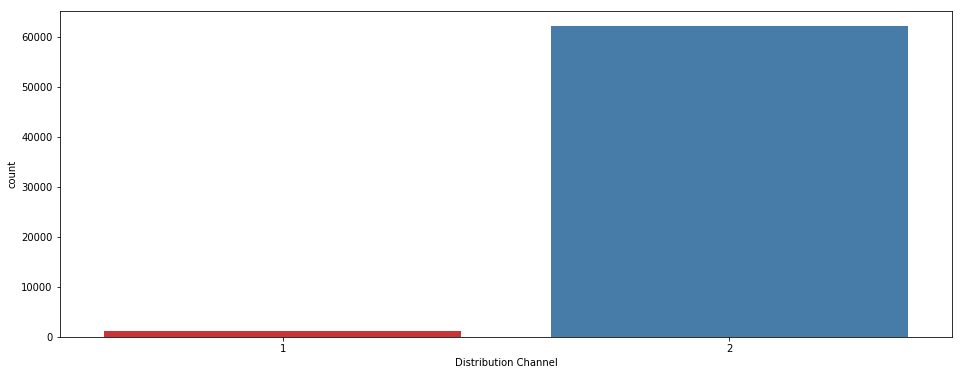

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
sns.countplot(x="Distribution Channel", data=df, palette="Set1",);

From the above graph, we can see that most of the travel insurance data comes from Online channel. 

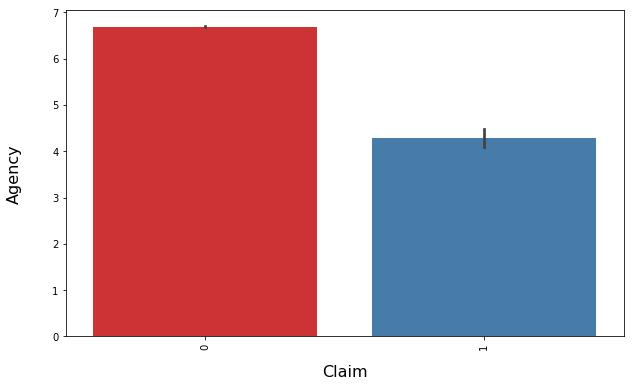

In [32]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='Claim', y='Agency', data=df, palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

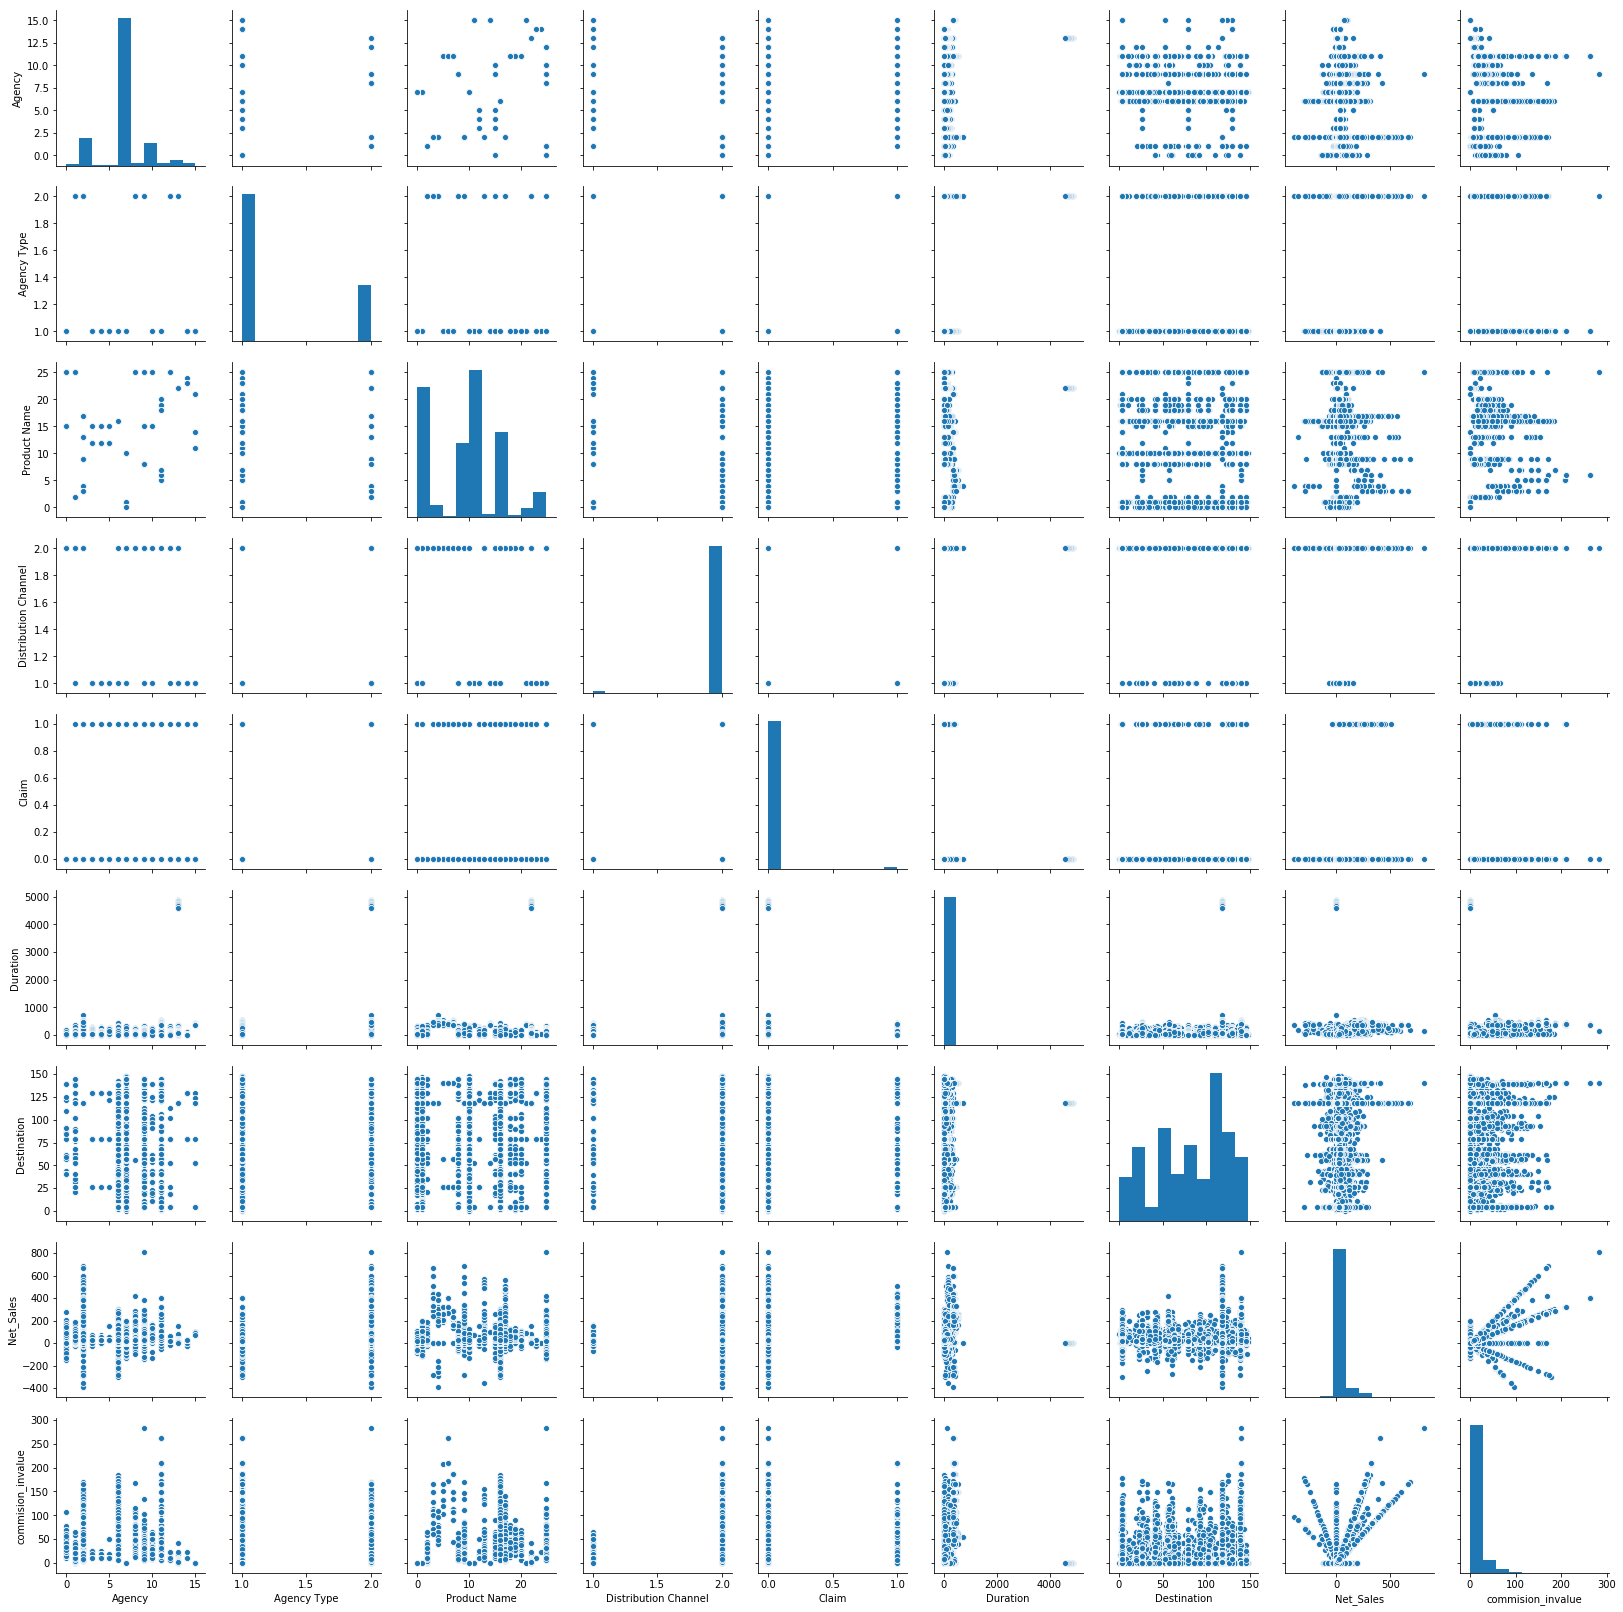

In [35]:
# choose attributes which shows relation
x = df[['Agency','Agency Type','Product Name','Distribution Channel','Claim','Duration','Destination','Net_Sales','commision_invalue']]
sns.pairplot(x)

### Generating leaderboard using H20 library

In [36]:
df.to_csv('Travel_insurance.csv' , sep=',')

In [37]:
data_path=None
all_variables=None
test_path=None
# target='search_term'
target=None
nthreads=1 
min_mem_size=6 
run_time=1000
classification=False
scale=False
max_models=20    
model_path=None
balance_y=False 
balance_threshold=0.5
name=None 
server_path=None  
analysis=0

In [38]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

3


In [39]:
# 65535 Highest port no
port_no=random.randint(5555,55555)
h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no)

Checking whether there is an H2O instance running at http://localhost:5830 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 24.80-b11, mixed mode)
  Starting server from C:\Users\Ashmita\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Ashmita\AppData\Local\Temp\tmpwq3mr0wk
  JVM stdout: C:\Users\Ashmita\AppData\Local\Temp\tmpwq3mr0wk\h2o_Ashmita_started_from_python.out
  JVM stderr: C:\Users\Ashmita\AppData\Local\Temp\tmpwq3mr0wk\h2o_Ashmita_started_from_python.err
  Server is running at http://127.0.0.1:5830
Connecting to H2O server at http://127.0.0.1:5830 ... successful.


H2O cluster uptime:,06 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.1
H2O cluster version age:,18 days
H2O cluster name:,H2O_from_python_Ashmita_ynj7r4
H2O cluster total nodes:,1
H2O cluster free memory:,3.522 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [40]:
data_path='Travel_Insurance.csv'


In [41]:
# Load data into H2O
train_data = h2o.import_file(data_path)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [42]:
train_data.head(5)

C1,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net_Sales,commision_invalue,Age
0,3,1,1,12,0,186,79,-29,9.57,81
1,3,1,1,12,0,186,79,-29,9.57,71
2,6,1,2,16,0,65,4,-49.5,29.7,32
3,6,1,2,16,0,60,4,-39.6,23.76,32
4,6,1,2,16,0,79,61,-19.8,11.88,41


In [43]:
target = 'Claim'

In [44]:
# dependent variable
# assign target and inputs for classification or regression
if target==None:
  target=train_data.columns[18]   
y = target

In [45]:
print(y)

Claim


In [46]:
def get_independent_variables(train_data, targ):
    C = [name for name in train_data.columns if name != targ]
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in train_data.types.items():
        if key in C:
            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    x = ints + enums + reals
    return x

X = get_independent_variables(train_data, target) 
print(X)
y = target
print(y)

['C1', 'Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Duration', 'Destination', 'Age', 'Net_Sales', 'commision_invalue']
Claim


Setting up runtime as 1000 seconds as specified. 

In [47]:
# setup autoML
run_time=1000
aml = H2OAutoML(max_runtime_secs=run_time)

In [48]:
logs_path = os.getcwd()
logfile = 'logs.txt'

In [ ]:
model_start_time = time.time()
aml.train(x=X,y=y,training_frame=train_data)  # Change training_frame=train

AutoML progress: |█████████████████████████████████████

In [56]:
# view the leaderboard
show_leader_board = aml.leaderboard
show_leader_board

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_BestOfFamily_AutoML_20190419_162910,0.0138209,0.117562,0.0138209,0.0276956,0.0818363
StackedEnsemble_AllModels_AutoML_20190419_162910,0.0138351,0.117623,0.0138351,0.0277263,0.0819143
GBM_grid_1_AutoML_20190419_162910_model_12,0.0138427,0.117655,0.0138427,0.0278063,0.0817886
GBM_grid_1_AutoML_20190419_162910_model_3,0.013859,0.117724,0.013859,0.0278305,0.0817862
GBM_grid_1_AutoML_20190419_162910_model_20,0.0138608,0.117732,0.0138608,0.0278345,0.0817755
GBM_grid_1_AutoML_20190419_162910_model_11,0.0138933,0.11787,0.0138933,0.0278705,0.0818446
GBM_grid_1_AutoML_20190419_162910_model_8,0.0139078,0.117931,0.0139078,0.0282228,0.0823204
GBM_5_AutoML_20190419_162910,0.0139186,0.117977,0.0139186,0.0281627,0.0823833
GBM_grid_1_AutoML_20190419_162910_model_6,0.0139245,0.118002,0.0139245,0.0277428,0.0823861
GBM_2_AutoML_20190419_162910,0.0139261,0.118009,0.0139261,0.0277512,0.0823713


Now as per the leaderboard generated, we need to beat that score. Lets try different techniques. 

### Logistic Regression 

In [109]:
cols_to_use = ['Agency','Agency Type','Distribution Channel','Product Name','Duration','Destination','Net_Sales','commision_invalue','Age']
y_cols_to_use = ['Claim']
X = df[cols_to_use]
y = df[y_cols_to_use]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(56993, 9) (56993, 1)
(6333, 9) (6333, 1)


In [110]:
df.head(5)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net_Sales,commision_invalue,Age
0,3,1,1,12,0,186,79,-29.0,9.57,81
1,3,1,1,12,0,186,79,-29.0,9.57,71
2,6,1,2,16,0,65,4,-49.5,29.70,32
3,6,1,2,16,0,60,4,-39.6,23.76,32
4,6,1,2,16,0,79,61,-19.8,11.88,41


In [111]:
col = LogisticRegression()
col.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [112]:
prob=col.predict_proba(X_test)
prob

array([[0.98849063, 0.01150937],
       [0.99341594, 0.00658406],
       [0.99398531, 0.00601469],
       ...,
       [0.99200609, 0.00799391],
       [0.98982973, 0.01017027],
       [0.99411518, 0.00588482]])

In [113]:
accuracy=col.score(X_test, y_test)
accuracy

0.9851571135322912

In [114]:
import statsmodels.formula.api as smf
def logisticModel(x):
    model1 = smf.Logit(df['Claim'],x).fit()
    print(model1.summary())

In [115]:
df.dtypes

Agency                     int8
Agency Type               int64
Distribution Channel      int64
Product Name               int8
Claim                     int32
Duration                  int64
Destination               int16
Net_Sales               float64
commision_invalue       float64
Age                       int64
dtype: object

In [116]:
logisticModel(df['Agency'])
logisticModel(df['Agency Type'])
logisticModel(df['Distribution Channel'])
logisticModel(df['Product Name'])
logisticModel(df['Duration'])
logisticModel(df['Net Sales'])
logisticModel(df['Commision (in value)'])
logisticModel(df['Destination'])
logisticModel(df['Age'])

Optimization terminated successfully.
         Current function value: 0.080520
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  Claim   No. Observations:                63326
Model:                          Logit   Df Residuals:                    63325
Method:                           MLE   Df Model:                            0
Date:                Fri, 19 Apr 2019   Pseudo R-squ.:                -0.05440
Time:                        17:49:03   Log-Likelihood:                -5099.0
converged:                       True   LL-Null:                       -4835.9
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Agency        -0.8263      0.009    -92.507      0.000      -0.844      -0.809
Optimization terminated succe

KeyError: 'Net Sales'

In [117]:
print(X_train)

       Agency  Agency Type  Distribution Channel  Product Name  Duration  \
30218       7            1                     2            10         9   
50542       6            1                     2            16        18   
40610       7            1                     2            10        22   
38554       7            1                     2            10        14   
26506       9            2                     2             8        15   
33559       9            2                     2             8        15   
31616       7            1                     2             0         1   
5642        7            1                     2             1        15   
60384      11            1                     2             5       365   
16360       6            1                     2            16        23   
15522       6            1                     2            16         6   
26117       7            1                     2             1         7   
20219       

In [118]:
from sklearn.linear_model import LinearRegression
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


In [119]:
# 10-fold cross-validation with all three features
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print(scores)

[0.02744556 0.0321108  0.03028208 0.03607034 0.01776696]


In [120]:
def cross_validation(x):
    newdf=x
    X = np.array(newdf.drop(['Agency','Agency Type','Distribution Channel','Product Name','Duration','Destination','Age'], axis=1), dtype=pd.Series)
    Y = np.array(newdf['Claim'], dtype=pd.Series)
    log_model = linear_model.LogisticRegression()
    score= cross_val_score(lm, X,Y, cv=10, scoring = make_scorer(mean_squared_error))
    rmse = np.sqrt(score)
    mean_rmse = rmse.mean()
    return mean_rmse

In [121]:
cross_validation(df)


1.0576790572376565e-14

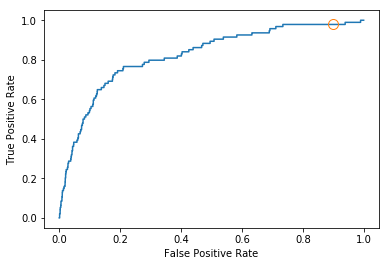

0.8228448025972519

In [122]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression

import sklearn.linear_model as sk

falsepos,truepos,thresholds=roc_curve(y_test,predictions)

plt.plot(falsepos,truepos,label="ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

cutoff=np.argmin(np.abs(thresholds))
plt.plot(falsepos[cutoff],truepos[cutoff],'o',markersize=10,label="cutoff",fillstyle="none")
plt.show()

from sklearn import metrics
metrics.auc(falsepos, truepos)

In [123]:
rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [124]:
train_score=lm.score(X_train, y_train)
test_score=lm.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print('logistic regression train score:', train_score)
print('logistic regression test score:', test_score)
print('ridge regression train score low alpha:;', Ridge_train_score)
print('ridge regression test score low alpha:', Ridge_test_score)
print('ridge regression train score high alpha:', Ridge_train_score100)
print('ridge regression test score high alpha:', Ridge_test_score100)

logistic regression train score: 0.031075443663879376
logistic regression test score: 0.03985562739432613
ridge regression train score low alpha:; 0.03107544366380044
ridge regression test score low alpha: 0.03985561992386688
ridge regression train score high alpha: 0.031068989008405934
ridge regression test score high alpha: 0.03978234604175224


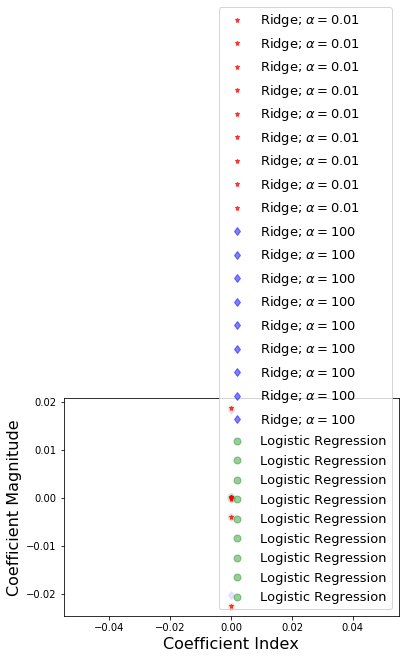

In [125]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lm.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Logistic Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

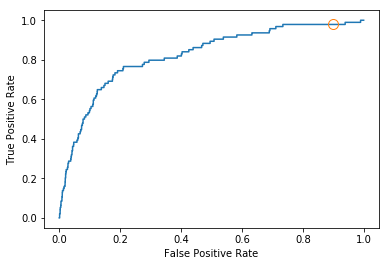

0.8228448025972519

In [126]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression

import sklearn.linear_model as sk

falsepos,truepos,thresholds=roc_curve(y_test,predictions)

plt.plot(falsepos,truepos,label="ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

cutoff=np.argmin(np.abs(thresholds))
plt.plot(falsepos[cutoff],truepos[cutoff],'o',markersize=10,label="cutoff",fillstyle="none")
plt.show()

from sklearn import metrics
metrics.auc(falsepos, truepos)

### SDGR Regressor


In [127]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [128]:
# Establish a model
model = SGDRegressor()

In [129]:
# Grid search - this will take about 1 minute.
param_grid = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
}
clf = GridSearchCV(model, param_grid)
clf.fit(X_train, y_train)
print("Best score: " + str(clf.best_score_))

Best score: 0.029763292474402996


### Random Forest 

In [130]:
from sklearn.ensemble import RandomForestClassifier
def split_dataset(dataset, train_percentage, feature_headers, target_header):
    """
    Split the dataset with train_percentage
    :param dataset:
    :param train_percentage:
    :param feature_headers:
    :param target_header:
    :return: train_x, test_x, train_y, test_y
    """
 
    # Split dataset into train and test dataset
    X_train, x_test, y_train, y_test = train_test_split(dataset[feature_headers], dataset[target_header],
                                                        train_size=train_percentage)
    return X_train, x_test, y_train, y_test

In [131]:
print(X_train)

[[ 0.14558575 -0.61682832  0.13458802 ... -0.56838639 -0.4966862
  -0.28354364]
 [-0.27557909 -0.61682832  0.13458802 ...  0.38258233  1.31063026
  -0.07051212]
 [ 0.14558575 -0.61682832  0.13458802 ... -2.47442283 -0.4966862
   0.85262443]
 ...
 [ 0.14558575 -0.61682832  0.13458802 ... -0.42492128 -0.4966862
  -0.28354364]
 [ 3.09373958 -0.61682832 -7.43008172 ... -0.21997112  0.03577235
  -0.14152263]
 [ 2.67257474  1.62119665  0.13458802 ... -0.60814672 -0.33948415
   0.56858241]]


In [132]:
def random_forest_classifier(features, target):
    """
    To train the random forest classifier with features and target data
    :param features:
    :param target:
    :return: trained random forest classifier
    """
    clf = RandomForestClassifier()
    clf.fit(features, target)
    return clf

In [133]:
# Train and Test dataset size details
print("Train_x Shape: ", X_train.shape)
print("Train_y Shape :: ", y_train.shape)
print("Test_x Shape :: ", X_test.shape)
print("Test_y Shape :: ", y_test.shape)

Train_x Shape:  (56993, 9)
Train_y Shape ::  (56993, 1)
Test_x Shape ::  (6333, 9)
Test_y Shape ::  (6333, 1)


In [134]:
trained_model = random_forest_classifier(X_train, y_train)

In [135]:
print("Trained model:", trained_model)

Trained model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [136]:
predictions = trained_model.predict(X_test)

In [139]:
for i in range(0, 5):
        print("Actual outcome :: {} and Predicted outcome :: {}".format(list(y_test)[i], predictions[i]))
        print("Train Accuracy :: ", accuracy_score(y_train, trained_model.predict(X_train)))

Actual outcome :: Claim and Predicted outcome :: 0


NameError: name 'accuracy_score' is not defined

In [140]:
from sklearn.metrics import confusion_matrix
#print("Test Accuracy  :: ", accuracy_score(y_test, predictions))
print(" Confusion matrix ", confusion_matrix(y_test, predictions))

 Confusion matrix  [[6224   15]
 [  94    0]]


In [141]:
rfc_cv_score = cross_val_score(trained_model, X_test, y_test, cv=35, scoring='roc_auc')

In [142]:
print("=== All AUC Scores ===")
print(rfc_cv_score)
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== All AUC Scores ===
[0.7858473  0.47206704 0.62849162 0.45251397 0.62942272 0.80912477
 0.79236499 0.44972067 0.62662942 0.6488764  0.45505618 0.61610487
 0.45786517 0.46910112 0.62546816 0.63764045 0.44382022 0.62546816
 0.4494382  0.59550562 0.64419476 0.45505618 0.46348315 0.7659176
 0.70224719 0.71207865 0.71910112 0.68679775 0.71207865 0.71769663
 0.73174157 0.46348315 0.45505618 0.71769663 0.69662921]
=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.6089652997599766


### Trying to improvise the model

In [143]:
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }

# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = trained_model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.1min finished


{'n_estimators': 90, 'max_features': 'auto', 'max_depth': 500}


In [144]:
rfc = RandomForestClassifier(n_estimators=600, max_depth=300, max_features='sqrt')
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
#print("=== Classification Report ===")
#print(classification_report(y_test, rfc_predict))
#print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[6226   13]
 [  93    1]]


=== All AUC Scores ===
[0.71486249 0.69416873 0.740376   0.7198942  0.6772815  0.68015233
 0.69546371 0.69750209 0.73242057 0.70003728]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.7052158901067204


### Tuning the hyperparameters and checking if auc scores improve


In [145]:
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }

# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = trained_model, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print(rfc_random.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 24.0min finished


{'n_estimators': 120, 'max_features': 'auto', 'max_depth': 340}


In [148]:
rfc = RandomForestClassifier(n_estimators=150, max_depth=400, max_features='sqrt')
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)
rfc_cv_score = cross_val_score(rfc, X, y, cv=20, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
#print("=== Classification Report ===")
#print(classification_report(y_test, rfc_predict))
#print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[6225   14]
 [  93    1]]


=== All AUC Scores ===
[0.70975177 0.66593017 0.58089539 0.68046918 0.70904596 0.71923759
 0.69384547 0.71891374 0.69431438 0.60571697 0.65446628 0.73601937
 0.65646948 0.7322638  0.67866499 0.67927467 0.71074415 0.7055393
 0.64048913 0.70901696]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.684053437542086


### Applying SVM logic

In [166]:
# packages to import
import numpy as np
import pylab as pl
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
#random_state = np.random.RandomState(0)

# Run classifier
classifier = svm.SVC(kernel='linear',probability=True)
probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)

In [167]:
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
print('Area under the ROC curve : %f' % roc_auc)

Area under the ROC curve : 0.294616


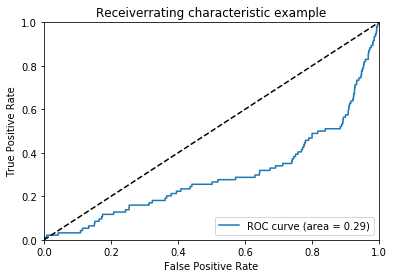

In [168]:
# Plot ROC curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiverrating characteristic example')
pl.legend(loc="lower right")
pl.show()

In [170]:
from sklearn.metrics import classification_report, confusion_matrix,roc_curve, auc  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))
print('Area under the ROC curve : %f' % roc_auc)

[[6239    0]
 [  94    0]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6239
           1       0.00      0.00      0.00        94

   micro avg       0.99      0.99      0.99      6333
   macro avg       0.49      0.50      0.50      6333
weighted avg       0.97      0.99      0.98      6333

Area under the ROC curve : 0.294616


## Conclusion

We have used multiple techniques to understand and find different metrics , especially auc score and tried to improvise the auc score.

As per H20, AUC score achieved is approximately 0.82. Inorder to improve this base auc score, we have applied logistic regression, Support Vector algorithm, Random Forest, SGDR Regressor.

Amongst all techniques, simple logistic regression along with Ridge regularization gives better score.We could achieve AUC score of 0.822 which is the closest to the score generated by H20 leaderboard. It beat the bot.

### Contribution

Code done by me : 60% Code referrred from external sources : 40%

### Citation

https://www.kaggle.com/mhdzahier/travel-insurance/kernels

http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-16.html

https://www.kaggle.com/parasjindal96/how-to-normalize-dataframe-pandas

https://towardsdatascience.com/how-to-perform-lasso-and-ridge-regression-in-python-3b3b75541ad8

https://www.kaggle.com/mhdzahier/predicting-imbalanced-claim-status/code

https://www.kaggle.com/c/criteo-display-ad-challenge/discussion/9561

https://www.kaggle.com/nsrose7224/stochastic-gradient-descent-regressor

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

### License

Copyright 2019 Ashmita Nigam

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.